# The Very Famous House Price Prediction Problem:    

### Problem Statement: With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. ###

#### Linning up my Strategy to Solve this Challenge:

1. Understand the problem by knowing your data
2. Univariate data analysis.
3. Multivariate data analysis.
4. Check for missing data.
5. Finding the outliers in the data.
6. Checking Skewness in the data.
7. Convert Categorical data items into numerical data items.
8. Scaling the data
9. Training Model on this data.

### Step 1: Understand the problem by knowing the data.
This Step involves having a look at the shape of the data, the content of the data, different type of datatypes present in the data. Also gathering some knowledge about problem by studies articles, blogs, researches on  market trends about this problem.

In [66]:
#importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [67]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [68]:
# Getting names of all the columns in the dataset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [69]:
# Printing the first 5 Rows of the data
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
# Getting information about each Column in the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [71]:
# Getting a statistical picture of the data items in terms of count, mean, standard deviation, distribution of values
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [72]:
df_train.shape

(1460, 81)

In [73]:
# Numerical Features
num_feat=df_train.select_dtypes(exclude=['object']).columns
print(num_feat)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [74]:
# Categorical Features
cat_feat=df_train.select_dtypes(include=['object']).columns
print(cat_feat)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### Step 2: Univariate data analysis. ####

In [75]:
# For the variable Saleprice, understanding its values using different statistical terms like
# mean, count, standard deviation
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

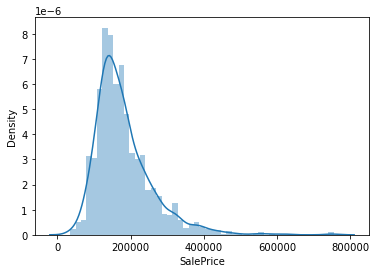

In [76]:
#plotting a histogram to check how the different values of saleprice are distributed
sns.distplot(df_train['SalePrice']);

Observations drawn looking at the Histogram
* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

In [77]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 3. Bivariate Data Analysis

#### Analysing all Against Saleprice (target)

### Part 1: For Numerical Features

In [78]:
# Filtering out the numerical features in a different data frame
df_train_num=df_train[num_feat]
df_train_num.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Correlation: Finding How closely one variable relate with another i.e. How strongly the value of the variable increase or decrease with change in value of another variable

In [79]:
# Checking the variables whose absolute correlation with Saleprice is more than 0.5
df_corr=df_train_num.corr()['SalePrice'][:-1]
high_corr_feat=df_corr[abs(df_corr)>0.5].sort_values(ascending=False)
print("There is {} strongly correlated value with SalePrice:\n{}".format(len(high_corr_feat), high_corr_feat))

There is 10 strongly correlated value with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [80]:
# Checking the variables whose absolute correlation with Saleprice is less than 0.05
less_corr_feat=df_corr[abs(df_corr)<0.05].sort_values(ascending=True)
print("There is {} loosely correlated value with SalePrice:\n{}".format(len(less_corr_feat), less_corr_feat))

There is 8 loosely correlated value with SalePrice:
YrSold         -0.028923
LowQualFinSF   -0.025606
Id             -0.021917
MiscVal        -0.021190
BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
Name: SalePrice, dtype: float64


#### As Sale price value is almost independent of values of above variables, they might be excluded from analysis for prediction house prices, but let's look further before making any haste

#### Plotting all Numerical Columns against Sale Price to get a more clear picture

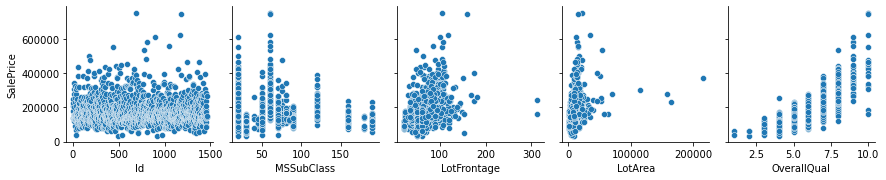

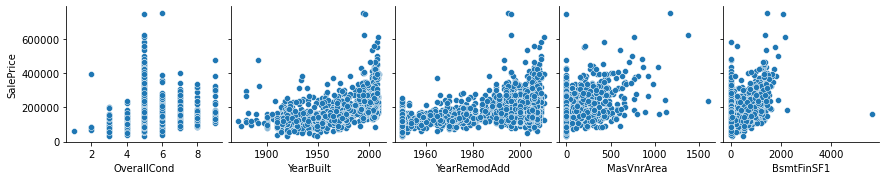

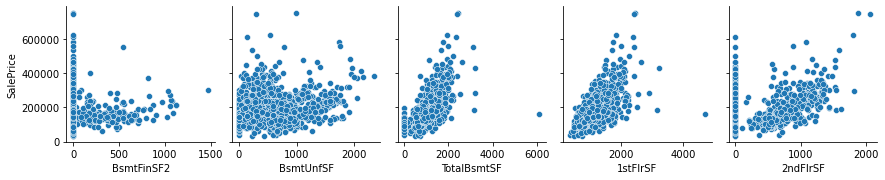

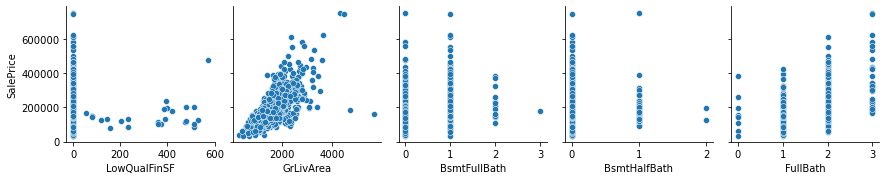

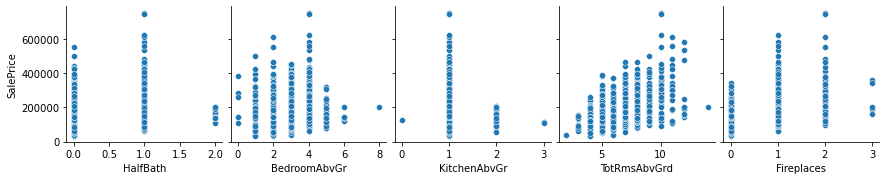

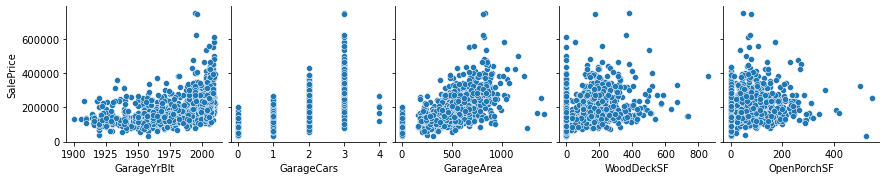

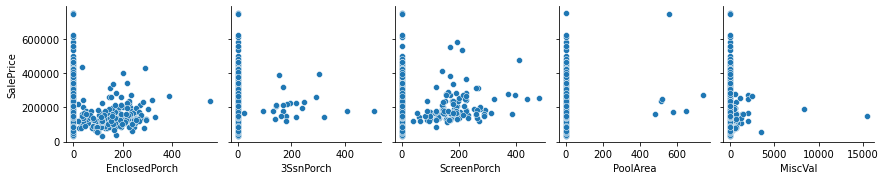

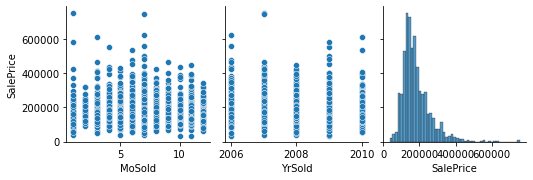

In [81]:
for i in range(0, len(df_train_num.columns), 5):
    sns.pairplot(data=df_train_num,
                x_vars=df_train_num.columns[i:i+5],
                y_vars=['SalePrice'])

##### We see that a lot of features have too many values zero, this might disrupt out calculations and conclusions of correlation

##### Looking at scatter plots excluding zero 
##### I find 'OverallCond' is somehow linearly correlated to SalePrice
##### But 'LowQualFinSF','YrSold'','MiscVal','Id','BsmtHalfBath','BsmtFinSF2' still do not show any relation and are still eligible to be dropped but let's do further analysis

### Part 2: For Categorical Features

In [82]:
# Getting list of different categories which each categorical feature belong too
for catg in list(cat_feat) :
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
Grvl    50
Pave    41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
############################################

#### Plotting Box Plots which are Generally Good Visual representation to Observe how categorical values are distributed

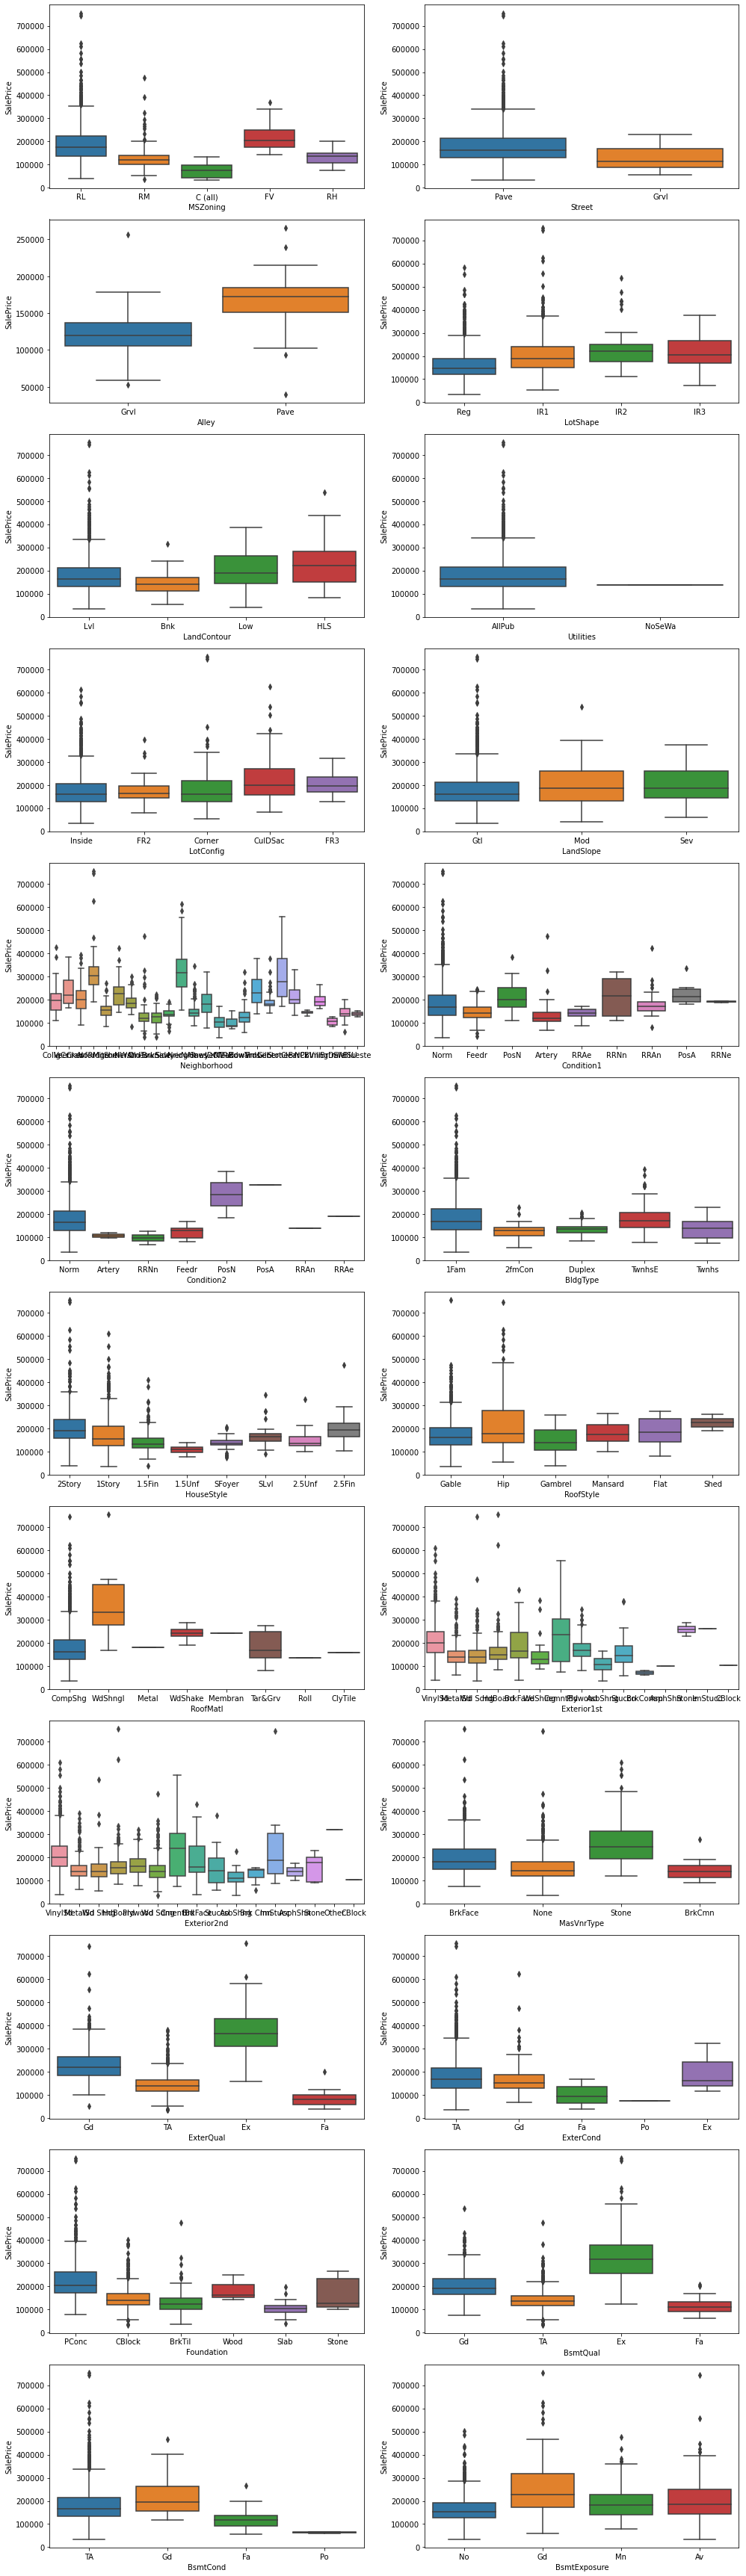

In [83]:
li_cat_feats = list(cat_feat)
nr_rows = 12
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

#### Many Good Conclusions can be Drawn From this :
#### House in Pave Street are Costilier than house in Grvl street.
#### House with Central air are Costilier than house without central air.
#### Many Categorical Featues like Electrical, heatingQC, BsmtFinType1 and many more are much helpful in classifying the house to a specific price segment.
#### Many features have outliers which will require treatment


### Step 4: Multivariate Data Analysis

#### This Step involves learning relationships between every pair of variable in dataset

#### Best place to start with is to draw a Correlation Matrix (heatmap) filtering pairs which have high absolute correlation

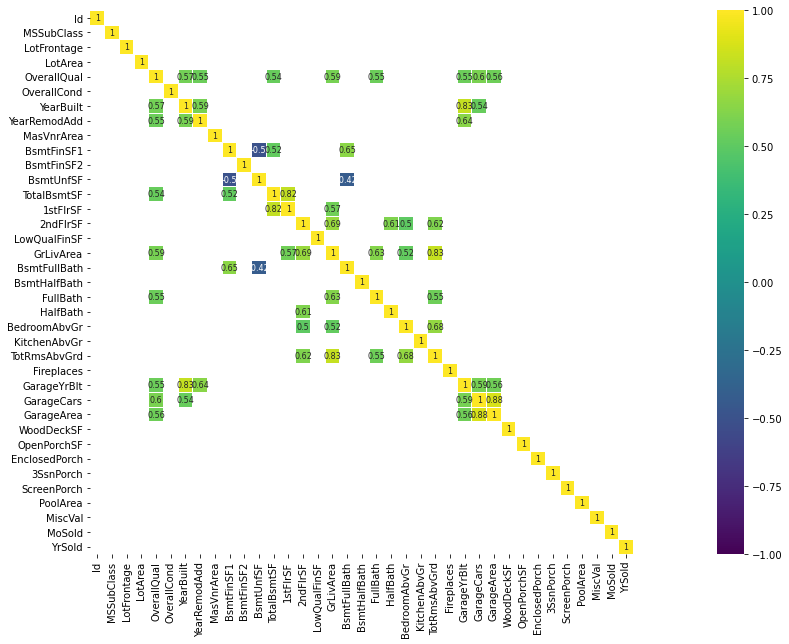

In [84]:
corr = df_train_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(30, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Observations:
#### Below features have Shown high correlation to one another:
* #### 'GrLivArea' and 'TotRmsAbvGrd'
#### 'GarageCars' and 'GarageArea'
#### 'TotalBsmtSF' and '1stFlrSF'
#### 'YearBuilt' and 'GarageYrBlt'
#### Of these similar features we drop the one that has smaller correlation coeffiecient to Target.


<AxesSubplot:>

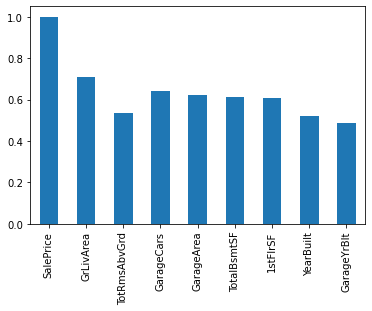

In [85]:
df_temp=df_train[['SalePrice','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','GarageYrBlt']]
df_temp.corr()['SalePrice'].plot(kind='bar')

 #### Therefore Marked for Dropping are:
#### GrLivArea, TotRmsAbvGrd, GarageArea, 1stFlrSF, GarageYrBlt
#### from Before
#### 'LowQualFinSF','YrSold'','MiscVal','Id','BsmtHalfBath','BsmtFinSF2'

### Step 5: Missing Data Analysis

In [86]:
# Finding the Percentage of values missing 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


#### Filling missing values
#### For a few columns there is lots of NaN entries.
#### However, reading the data description we find this is not missing data:
#### For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc

In [87]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


In [88]:
df_train1=df_train.drop('SalePrice',axis=1)
df_all= pd.concat([df_train1,df_test]).reset_index(drop=True)

df_all.shape

(2919, 80)

In [89]:
df_train.shape

(1460, 81)

In [90]:
y_train=df_train['SalePrice']
y_train.shape

(1460,)

#### MSZoning, Utilities, Exteriors, Electrical, Functional, Utilities and SaleType
#### There are not many missing values, so we will just go with the mode of the neighbourhood.

In [91]:
feats = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Functional',
         'SaleType']
model = df_train.groupby('Neighborhood')[feats].apply(lambda x: x.mode().iloc[0])

for f in feats:
    df_all[f].fillna(df_all['Neighborhood'].map(model[f]), inplace=True)

#### Lot frontage
#### My best guess is that it depends somewhat strongly on the configuration of the lot (inside/corner/cul/2-frontage/3-frontage).

In [92]:
df_all['LotFrontage'] = df_all['LotFrontage'].fillna(df_train['LotFrontage'].median())

#### KitchenQual
#### Again, very few missing values. We will substitute in this case with the 'OverallQual' value.

In [93]:
df_all['KitchenQual'].fillna(df_all['OverallQual'], inplace=True)


#### Basement, garage, fireplaces and other features
#### We can interpret an NA in all these things as "the house does not have this feature".

In [94]:
bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath',
        'BsmtHalfBath', 
        'TotalBsmtSF']
fire = ['Fireplaces', 'FireplaceQu']
garage = ['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 
          'GarageArea', 'GarageYrBlt']
masn = ['MasVnrType', 'MasVnrArea']
others = ['Alley', 'Fence', 'PoolQC', 'MiscFeature']

cats = df_all.columns[df_all.dtypes == 'object']
nums = list(set(df_all.columns) - set(cats))

# Be sure the category 'None' is also handled here
df_all['MasVnrType'].replace({'None': np.nan}, inplace=True)

df_all[cats] = df_all[cats].fillna('0')
df_all[nums] = df_all[nums].fillna(0)

In [95]:
df_all.shape

(2919, 80)

In [96]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0.0,0.0
MSSubClass,0.0,0.0
GarageType,0.0,0.0
FireplaceQu,0.0,0.0
Fireplaces,0.0,0.0
Functional,0.0,0.0
TotRmsAbvGrd,0.0,0.0
KitchenQual,0.0,0.0
KitchenAbvGr,0.0,0.0
BedroomAbvGr,0.0,0.0


#### All Missing Data has been Dealth with

In [97]:
#Now Dropping the Columns we have Marked for deletion
df_all=df_all.drop(['GrLivArea','TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt','LowQualFinSF','YrSold','MiscVal','Id','BsmtHalfBath','BsmtFinSF2'],axis=1)


In [98]:
df_all.shape

(2919, 69)

In [99]:
df_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature',

Adjusting the type of variable
First, there are a few features that are not represented with the right type of variable:

'MSSubClass': represented as an integer, when it is just a category label (we will use 'object' for now)
'MoSold': represented as an integer, a month is just a category label out of 12 possibilities (we will use 'object' for now)
'BsmtFullBath', 'BsmtHalfBath': these two represent integers and not floats (or I at least I do not know what a third of half bathroom is)
years: a year, in the context of this dataset, is an integer, and not a float
'GarageCars': represented as a float, it is an actual integer (nobody wants to have 0.5 car at home)

In [100]:
years = ['YearBuilt', 'YearRemodAdd']
df_all['MSSubClass'] = df_all['MSSubClass'].astype('object', copy=False)
df_all['MoSold'] = df_all['MoSold'].astype('object', copy=False)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].astype('int64', copy=False)
df_all['GarageCars'] = df_all['GarageCars'].astype('int64', copy=False)
df_all[years] = df_all[years].astype('int64', copy=False)

### Step 6: Finding the Outliers in the data

#### Outlier handling is done using the mean and the standard deviation. We have taken three features which have highest correlation to the sale price based on which outliers have been removed.

In [101]:
outlier_features = ["OverallQual","GarageCars","TotalBsmtSF"]

means,sds = np.mean(df_all[outlier_features]),np.std(df_all[outlier_features])
lower,upper = means - 2.5*sds , means + 2.5*sds
def compare(x):
    count=0
    for col in outlier_features:
        if x[col]>lower[col] and x[col]<upper[col]:
            count=count+1
    if count==len(outlier_features):
        return True
    else: 
        return False

index = len(df_train)
y= y_train.array
sub_data = df_all.loc[:index-1]  
test_1 = df_all.loc[index:,:]

data_train_new = sub_data.loc[sub_data.apply(lambda x: compare(x),axis=1)]
y= y[sub_data.apply(lambda x: compare(x),axis=1)]

index = len(data_train_new)
df_all = pd.concat([data_train_new,test_1]).reset_index(drop=True)

In [102]:
df_all.shape

(2883, 69)

### Step 7:  Finding Skewness in Data


The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

We will draw boxplot - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

In [103]:
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
df_all_num = df_all.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

PoolArea         18.598016
LotArea          13.227511
3SsnPorch        11.304124
KitchenAbvGr      4.308230
EnclosedPorch     4.001455
ScreenPorch       3.931652
MasVnrArea        2.537081
OpenPorchSF       2.508356
WoodDeckSF        1.868117
LotFrontage       1.242099
BsmtFinSF1        0.964203
BsmtUnfSF         0.911018
2ndFlrSF          0.826585
Fireplaces        0.736080
HalfBath          0.699694
BsmtFullBath      0.634100
OverallCond       0.587560
TotalBsmtSF       0.545446
BedroomAbvGr      0.333155
OverallQual       0.173972
FullBath          0.169433
GarageCars       -0.251691
YearRemodAdd     -0.445471
YearBuilt        -0.588338
dtype: float64

#### Let's visualize skewed variable using boxplots and distplot

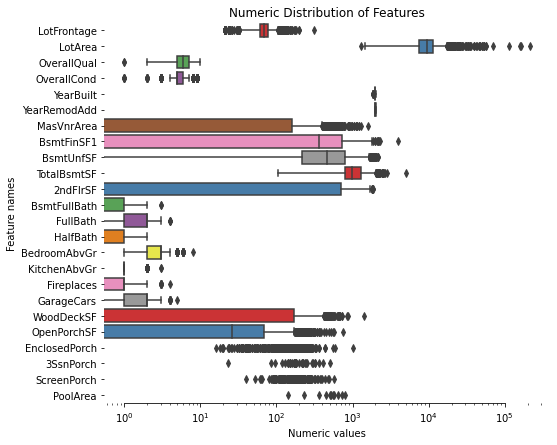

In [104]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all_num , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

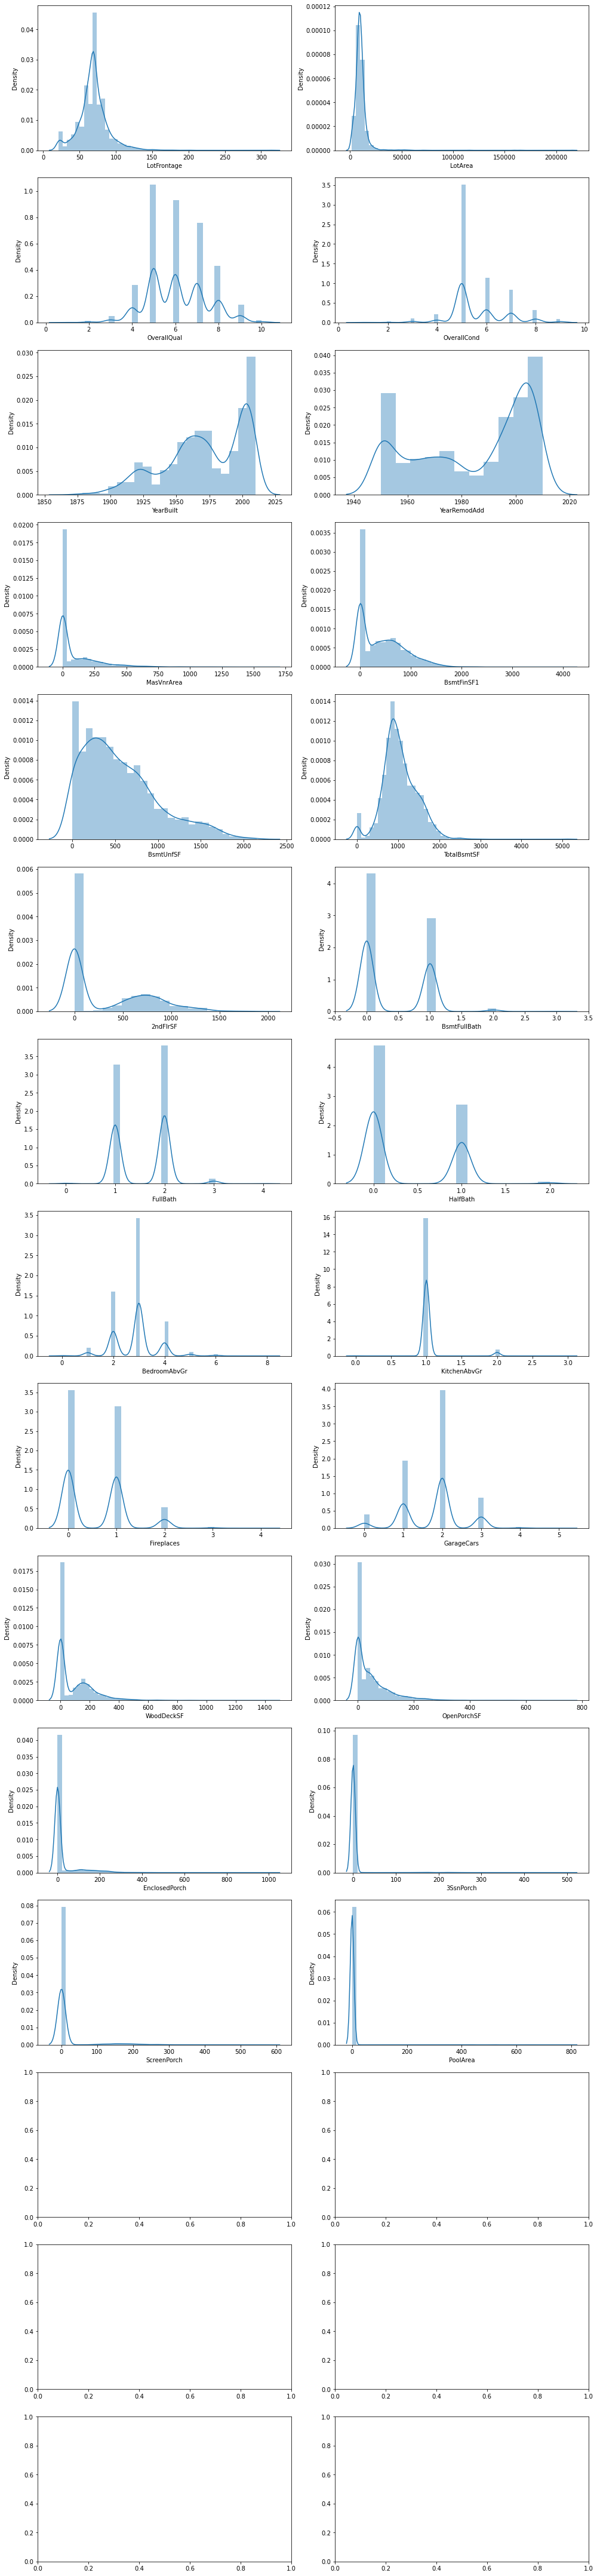

In [105]:
num_feat=df_all.select_dtypes(exclude=['object']).columns
li_num_feats = list(num_feat)
nr_rows = 15
nr_cols = 2

df_all_copy=df_all.copy()

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*4))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_num_feats):
            sns.distplot(df_all[li_num_feats[i]],ax = axs[r][c]);
plt.tight_layout()    
plt.show()

In [106]:
# Normalize skewed features using a Box-Cox power transformation, we can use other techniques but am using boxpox
# as it works very well on this dataset
for i in skew_index:
    df_all[i] = boxcox1p(df_all[i], boxcox_normmax(df_all[i] + 1.002))

In [107]:
df_all_num = df_all.select_dtypes(include=['int64','float64'])
skew_features = df_all_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

PoolArea         16.199734
3SsnPorch         8.809104
KitchenAbvGr      3.778599
ScreenPorch       3.152066
EnclosedPorch     2.140485
MasVnrArea        0.981665
2ndFlrSF          0.887824
WoodDeckSF        0.789439
HalfBath          0.735962
BsmtFullBath      0.626280
OpenPorchSF       0.621761
Fireplaces        0.560109
OverallCond       0.381814
BsmtFinSF1        0.366564
BedroomAbvGr      0.333155
TotalBsmtSF       0.273697
OverallQual       0.173972
FullBath          0.169433
LotFrontage       0.067000
BsmtUnfSF         0.052920
LotArea          -0.144092
GarageCars       -0.251691
YearRemodAdd     -0.445471
YearBuilt        -0.588338
dtype: float64

#### Rechecking if skewness is fixed

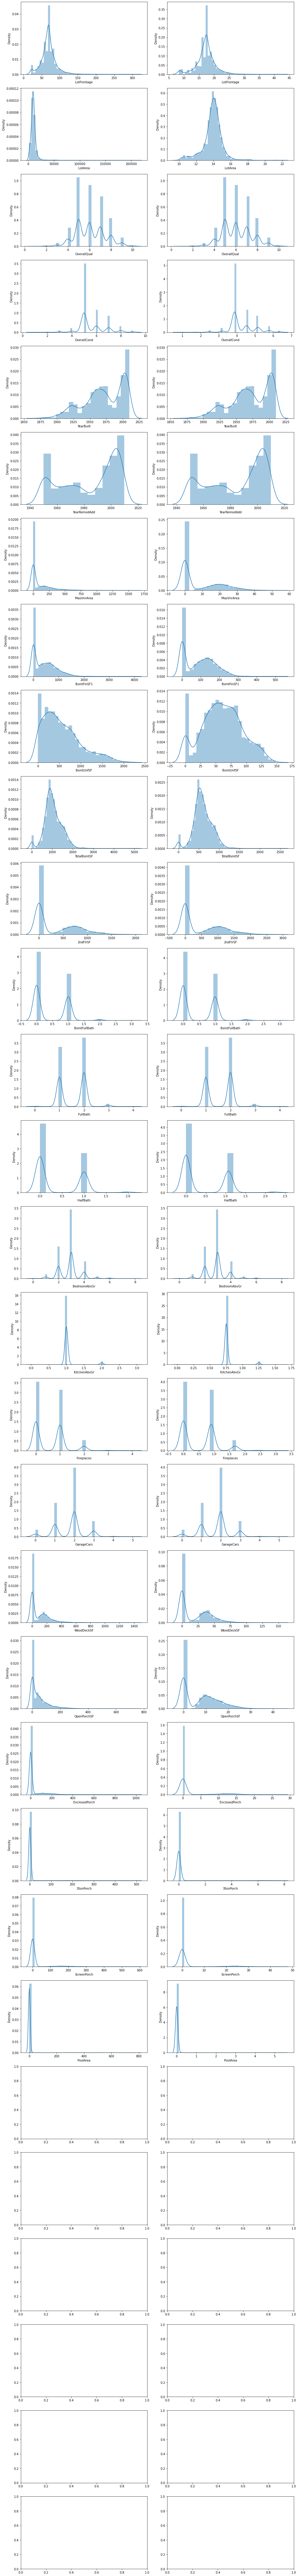

In [108]:
li_num_feats = list(num_feat)
nr_rows = 30
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*4))
for r in range(0,nr_rows): 
        i = r
        if i < len(li_num_feats):
            sns.distplot(df_all_copy[li_num_feats[i]],ax = axs[r][0]);
            sns.distplot(df_all[li_num_feats[i]],ax = axs[r][1]);
plt.tight_layout()    
plt.show()

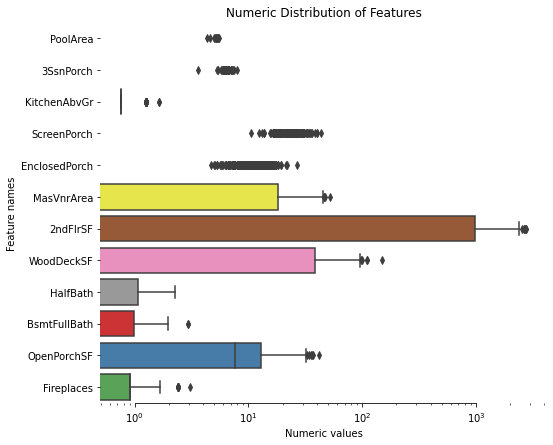

In [109]:
# Let's make sure we handled all the skewed values
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_all[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

### Step 8: Converting Categorical Values into Numerical Values

In [110]:
df_all_num= df_all.select_dtypes(include=['float64','int64']).columns  # Numerical columns
df_all_cat = df_all.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
df_all_dummy= pd.get_dummies(df_all_cat,drop_first=True)
df_all=pd.concat([df_all,df_all_dummy],axis=1) # joining converted dummy feature and original df_all dataset
df_all= df_all.drop(df_all_cat.columns,axis=1) #removing original categorical columns
df_all.shape

(2883, 273)

In [111]:
df_all.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_

In [62]:
x_train1= df_all[:len(df_train)] #converted into train data
x_test1= df_all[len(df_train):] #test data



### Step 9: Scaling the Data

Scaler class:
Machine learning algorithm that works on numbers does not know what that number represents. A weight of 10 grams and a price of 10 dollars are two different things, but for mode it is the just the same numbers.

The problem is that if 1 feature is much bigger than other feature, then the assumption algorithm makes that since first feature is bigger than second one, than it is more important.

We can solve this problem by getting all features in same not big range. Let's say  −1≤xi≤1 , where  xi  is a feature

There are many scalers, but we will be using Min-Max scaler.

xnew=x−xminxmax−xmin
 
MinMaxScaler scales all the data features in the range  [0,1]

In [63]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train1)
x_test = sc.transform(x_test1)

### Step 10: Training Models on this data.

### A.LinearRegression


In [64]:
lr = LinearRegression().fit(x_train, y_train) 

In [65]:
r_sq = lr.score(x_train, y_train)
print('coefficient of determination - rsquare - on training data :', r_sq)


coefficient of determination - rsquare - on training data : 0.186549651547126


In [52]:
maxcoef = np.argsort(-np.abs(lr.coef_))
coef = lr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

KitchenQual_TA........... -1.6340e+10
KitchenQual_Gd........... -1.6072e+10
GarageQual_TA............  1.5368e+10
BsmtQual_TA..............  1.3347e+10
BsmtQual_Gd..............  1.3310e+10


In [53]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


### B. Linear regression, L1 regularisation¶


In [54]:
# Create linear regression object
Ls = LassoCV()

# Train the model using the training sets
Ls.fit(x_train, y_train)

LassoCV()

In [56]:
r_sq = Ls.score(x_train, y_train)
print('coefficient of determination - rsquare - on training data :', r_sq)

coefficient of determination - rsquare - on training data : 0.0


In [57]:
maxcoef = np.argsort(-np.abs(Ls.coef_))
coef = Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

LotFrontage..............  0.0000e+00
BsmtExposure_Av..........  0.0000e+00
BsmtExposure_Gd..........  0.0000e+00
BsmtExposure_Mn.......... -0.0000e+00
BsmtExposure_No.......... -0.0000e+00


### C. Linear regression, L2 regularisation¶


In [58]:
# Create linear regression object
Rr = RidgeCV()

# Train the model using the training sets
Rr.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [59]:
r_sq = Rr.score(x_train, y_train)
print('coefficient of determination - rsquare - on training data :', r_sq)

coefficient of determination - rsquare - on training data : 0.18011784475105064


In [60]:
maxcoef = np.argsort(-np.abs(Rr.coef_))
coef = Rr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

RoofStyle_Hip............ -7.5518e-02
BldgType_TwnhsE.......... -7.4627e-02
BldgType_Twnhs........... -7.3772e-02
MSZoning_RM..............  7.0301e-02
Exterior1st_CemntBd...... -6.7955e-02
